# Regressão Logística


       ID Customer_ID    Month             Name   Age          SSN Occupation  \
0  0x1604   CUS_0xd40    March    Aaron Maashoh  -500  821-00-0265  Scientist   
1  0x1607   CUS_0xd40     June    Aaron Maashoh    23  821-00-0265  Scientist   
2  0x160e  CUS_0x21b1  January  Rick Rothackerj   28_  004-07-5839    _______   
3  0x1611  CUS_0x21b1    April  Rick Rothackerj    28  004-07-5839    Teacher   
4  0x1613  CUS_0x21b1     June  Rick Rothackerj    28  004-07-5839    Teacher   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12                    NaN                  3  ...        Good   
1      19114.12                    NaN                  3  ...        Good   
2      34847.84            3037.986667                  2  ...        Good   
3      34847.84                    NaN                  2  ...        Good   
4      34847.84            3037.986667                  2  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio

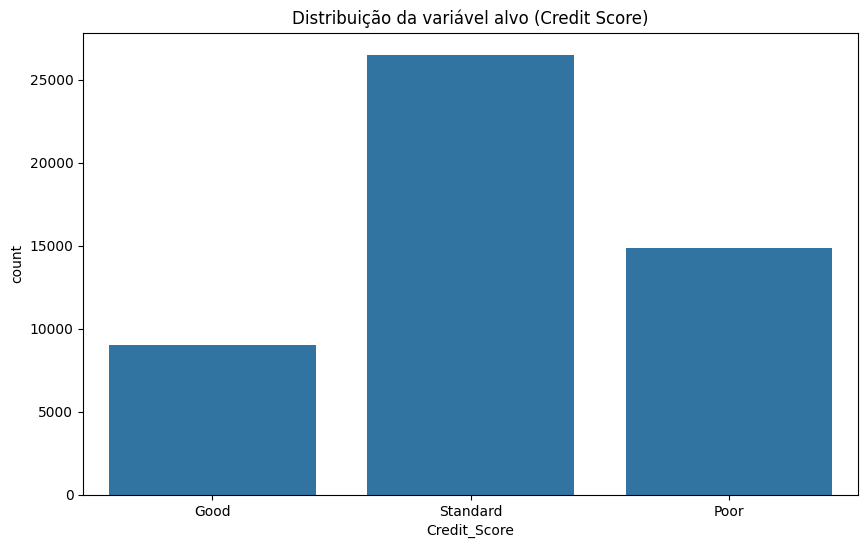

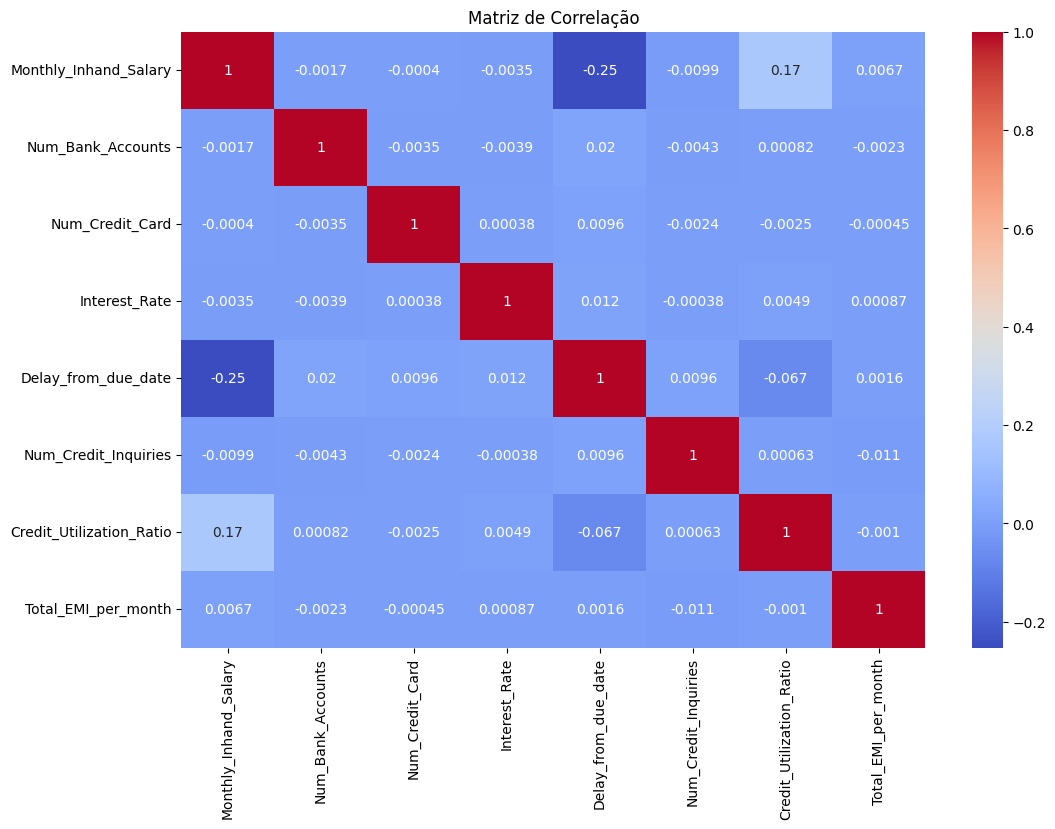

In [ ]:
# Importação de Bibliotecas
import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar uma amostra dos dados (50% dos dados)
train_df = pd.read_csv('train.csv', skiprows=lambda i: i > 0 and random.random() > 0.5)
test_df = pd.read_csv('test.csv', skiprows=lambda i: i > 0 and random.random() > 0.5)


print(train_df.head())
print(train_df.info())
print(train_df.describe())


plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', data=train_df)
plt.title('Distribuição da variável alvo (Credit Score)')
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()



# Pré-processamento

In [ ]:

train_df.fillna(train_df.mean(numeric_only=True), inplace=True)

categorical_features = train_df.select_dtypes(include=['object']).columns


categorical_features = [col for col in categorical_features if col != 'Credit_Score']

le = LabelEncoder()
for col in categorical_features:
    train_df[col] = le.fit_transform(train_df[col].astype(str))

print(train_df.shape)
print(train_df.memory_usage(deep=True).sum() / (1024 ** 2), "MB")


X = train_df.drop('Credit_Score', axis=1)
y = train_df['Credit_Score']

top_columns = X.std().sort_values(ascending=False).head(300).index
X_reduced = X[top_columns]


X_train, X_val, y_train, y_val = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


(50334, 28)
13.397859573364258 MB


Acurácia: 0.55
Relatório de Classificação:
              precision    recall  f1-score   support

        Good       0.42      0.07      0.12      1780
        Poor       0.58      0.29      0.39      2928
    Standard       0.56      0.86      0.68      5359

    accuracy                           0.55     10067
   macro avg       0.52      0.41      0.39     10067
weighted avg       0.54      0.55      0.49     10067



/Users/laurafriozi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


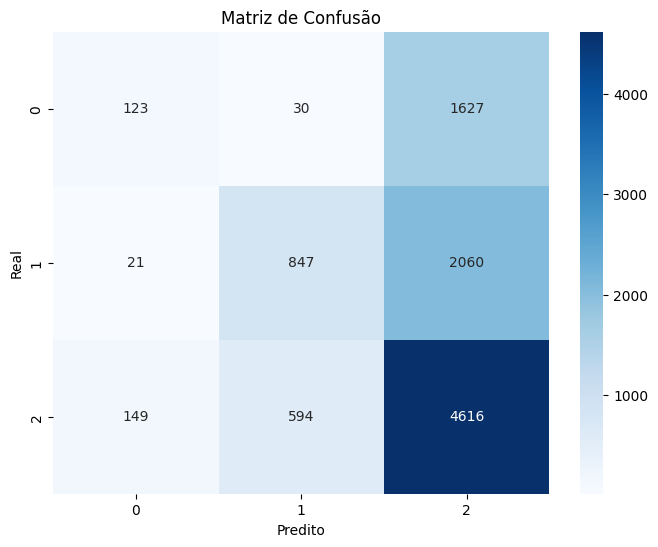

In [ ]:
# Treinamento do modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_val)

print(f'Acurácia: {accuracy_score(y_val, predictions):.2f}')
print('Relatório de Classificação:')
print(classification_report(y_val, predictions))


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
